<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Copy_of_Final_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:-** More specifically, we are working with a Car Sale Adverts dataset provided by AutoTrader(one of the industry partners). The dataset contains an anonymised collection of adverts with information on vehicles such as brand, type, colour, mileage, as well as the selling price.  Need to
perform a structured set of tasks with the ultimate goal of learning about associations and group differences that have a significant effect on the valuation of vehicles.

Below steps are performed :-

1. **Exploratory Data Analysis**

2. **Data Preprocessing**

3. **Association and Group Differences**

4. **Model Implemetation**

# **Exploratory Data Analysis**

**Importing Standard Python Libraries**

In [1]:
import pandas as pd
# Pandas library used for data analysis and manipulation
import numpy as np #Numpy library used for Mathematical operations
#Seaborn and Matplotlib libraries are used for plotting
import seaborn as sns   
import matplotlib.pyplot as plt

**Loading and reading dataset using pandas library**

In [2]:
car_dataset = pd.read_csv('adverts.csv') # Loading dataset using pandas
car_dataset.head() # It shows the top data details

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [3]:
car_dataset.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [4]:
car_dataset.dtypes # it shows attributes data types

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

The **Target Variable** is not having any relation with these attributes (vehicle_condition and public_reference) hence removing those unnecessary Columns

In [5]:
car_dataset.drop("public_reference",axis=1,inplace=True) # 
car_dataset.drop("vehicle_condition",axis=1,inplace=True)

In [6]:
car_dataset['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [7]:
car_dataset = car_dataset[car_dataset['reg_code'].str.contains('[a-zA-Z]') == False] # In reg_code we have few rows which are str hence ignoring those rows 

In [8]:
car_dataset['reg_code'].unique()

array(['61', '17', '16', '64', '13', '08', '19', '60', '69', '66', '12',
       '18', '65', '09', '10', '14', '03', '67', '63', '15', '68', '56',
       '20', '70', '62', '11', '05', '59', '58', '02', '57', '06', '52',
       '53', '04', '07', '55', '51', '54', '94', '85', '95', '38', '37'],
      dtype=object)

In [9]:
car_dataset.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'year_of_registration', 'price', 'body_type',
       'crossover_car_and_van', 'fuel_type'],
      dtype='object')

In [10]:
# crossover_car_and_van is a bool type (False or Ture) converting the bool to int using below line
car_dataset["crossover_car_and_van"] = car_dataset["crossover_car_and_van"].astype(int)

<ipython-input-10-e19abce04f0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset["crossover_car_and_van"] = car_dataset["crossover_car_and_van"].astype(int)


**"crossover_car_and_van"** is a float value hence converted it in to integer

In [11]:
car_dataset['crossover_car_and_van']

1         0
2         0
3         0
4         0
5         0
         ..
402000    0
402001    0
402002    0
402003    0
402004    0
Name: crossover_car_and_van, Length: 367233, dtype: int64

In [12]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367233 entries, 1 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                367124 non-null  float64
 1   reg_code               367233 non-null  object 
 2   standard_colour        363138 non-null  object 
 3   standard_make          367233 non-null  object 
 4   standard_model         367233 non-null  object 
 5   year_of_registration   365542 non-null  float64
 6   price                  367233 non-null  int64  
 7   body_type              366579 non-null  object 
 8   crossover_car_and_van  367233 non-null  int64  
 9   fuel_type              366836 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.8+ MB


In [13]:
car_dataset.describe(include=[object]) # Knowing data for categorical values

,reg_code,standard_colour,standard_make,standard_model,body_type,fuel_type
count,367233,363138,367233,367233,366579,366836
unique,44,22,95,944,16,9
top,17,Black,BMW,Golf,Hatchback,Petrol
freq,36738,80202,35441,10841,155956,194671


In [14]:
car_dataset.describe() #Knowing data for Numerical values

,mileage,year_of_registration,price,crossover_car_and_van
count,367124.000000,365542.000000,3.672330e+05,367233.000000
mean,40564.707137,2015.181054,1.573444e+04,0.004387
std,34094.158663,7.704411,2.398606e+04,0.066088
min,0.000000,999.000000,1.800000e+02,0.000000
25%,14333.000000,2013.000000,7.000000e+03,0.000000
50%,31531.000000,2016.000000,1.190000e+04,0.000000
75%,59316.000000,2018.000000,1.850000e+04,0.000000
max,999999.000000,2020.000000,3.799995e+06,1.000000


**Finding Missing Values**

In [15]:
car_dataset.isnull().sum() # Finding Missing Values

mileage                   109
reg_code                    0
standard_colour          4095
standard_make               0
standard_model              0
year_of_registration     1691
price                       0
body_type                 654
crossover_car_and_van       0
fuel_type                 397
dtype: int64

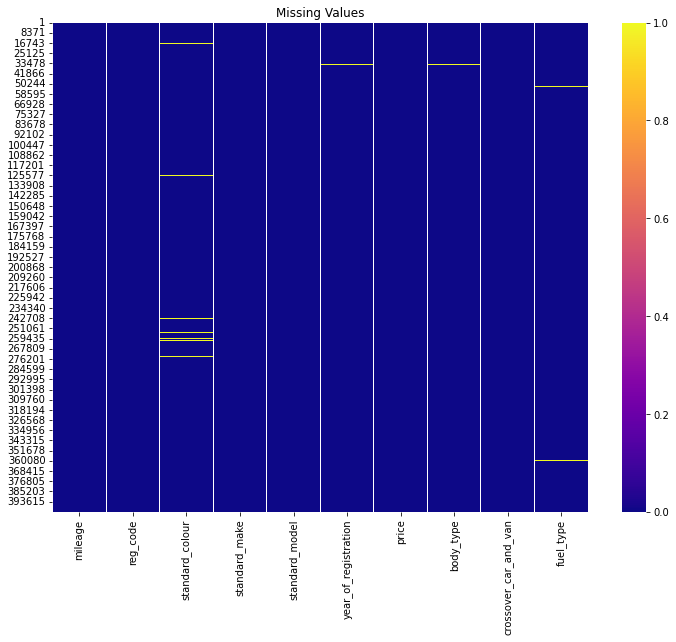

In [16]:
#Finding missing values using Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9)) 
sns.heatmap(car_dataset.isna(), cmap='plasma')
plt.title("Missing Values") 
plt.show()

**Finding outliers**

*Explored the numerical data types found three* **attributes are effected by outliners** 

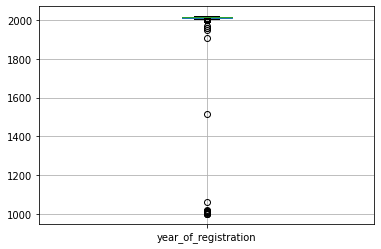

In [17]:
#Finding outliers in Numerical variables
figure =car_dataset.boxplot('year_of_registration')

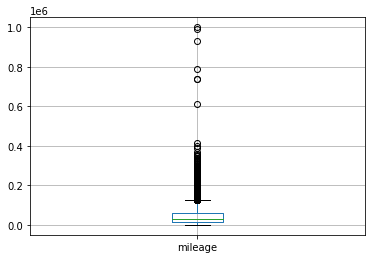

In [18]:
figure =car_dataset.boxplot('mileage')

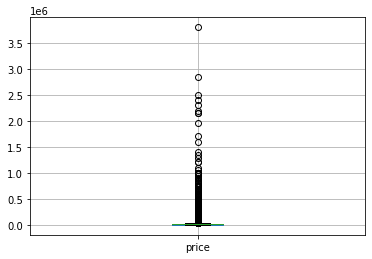

In [19]:
figure =car_dataset.boxplot('price')

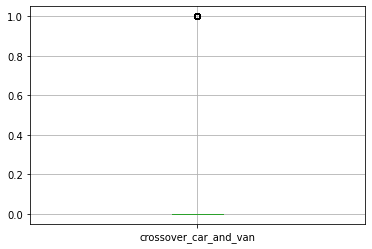

In [20]:
figure =car_dataset.boxplot('crossover_car_and_van')

In [21]:
car_dataset["reg_code"] = car_dataset["reg_code"].astype(int)

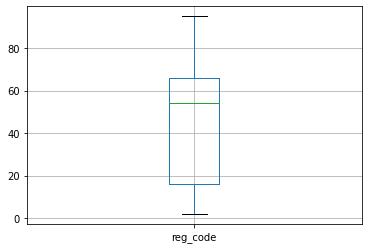

In [22]:
figure =car_dataset.boxplot('reg_code')

**Finding Skew data**

In [23]:
car_dataset.skew()

<ipython-input-23-0629bea908e9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_dataset.skew()


mileage                   1.464387
reg_code                 -0.026332
year_of_registration    -97.633679
price                    41.477460
crossover_car_and_van    14.998656
dtype: float64

**There were skewed values in the dataset**

# **Data Pre-Processing**

**Handling Missing Vales**

In [24]:
car_dataset.isnull().sum() # Finding missing data

mileage                   109
reg_code                    0
standard_colour          4095
standard_make               0
standard_model              0
year_of_registration     1691
price                       0
body_type                 654
crossover_car_and_van       0
fuel_type                 397
dtype: int64

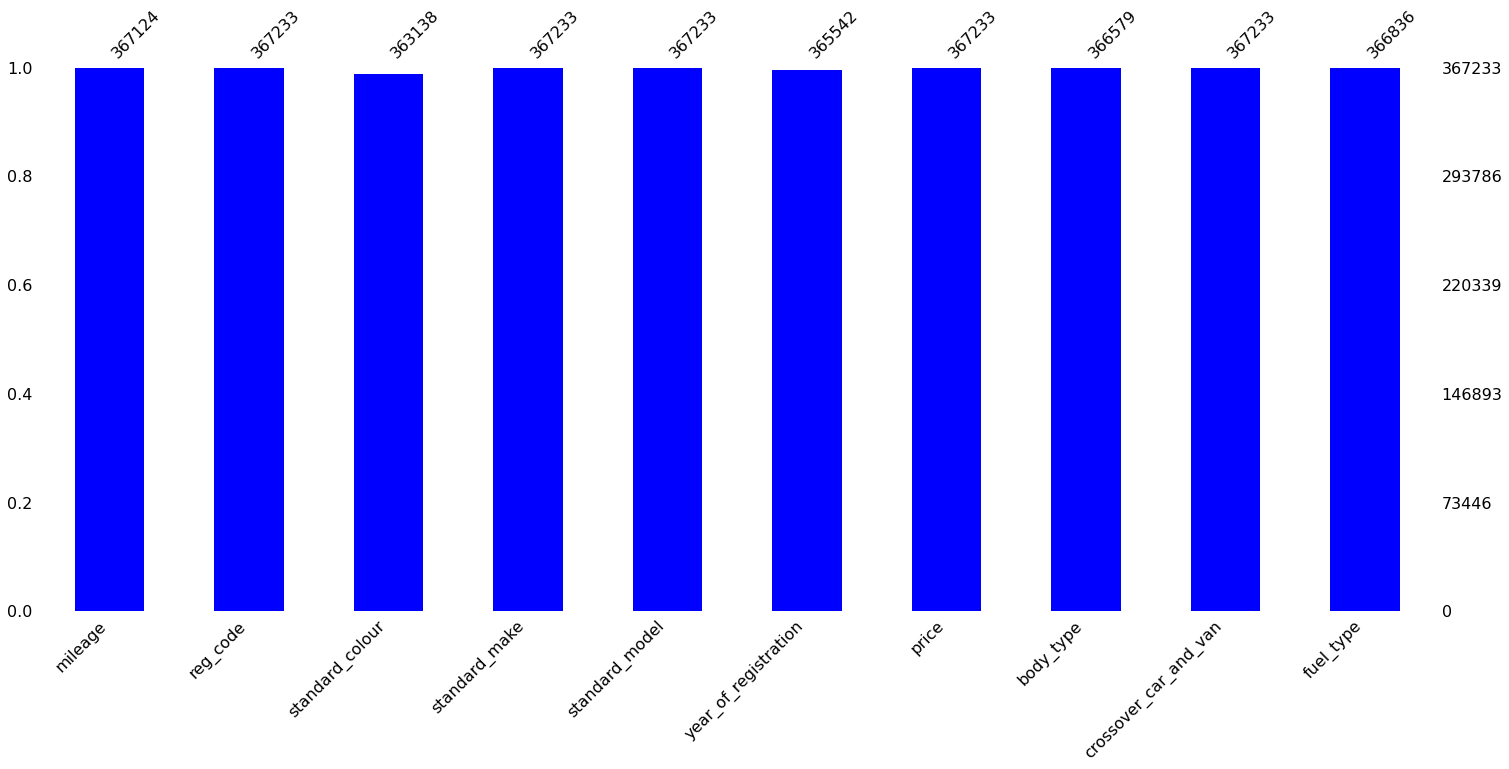

In [25]:
import missingno as msno
msno.bar(car_dataset, color="blue");

As of our dataset is huge and there were missing present in the dataset. Have used the drop.na method which helps to remove the rows that contains **NULL** values.

In [26]:
car_dataset = pd.DataFrame(car_dataset)
# using dropna() function 
car_dataset = car_dataset.dropna()

In [27]:
car_dataset.isnull().sum()

mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

**Handling Outliers**

In [28]:
def hapus_outliers(data, x): # created a function for handling outliers
    A = data[x].quantile(0.30)
    B = data[x].quantile(0.70)
    IQR = B - A
    data = data[~((data[x] < (A - 1.5 * IQR)) | (data[x] > (B + 1.5 * IQR)))]
    return data

In [29]:
#Appling the above function for treating outliers
car_dataset = hapus_outliers(car_dataset, 'price')
car_dataset = hapus_outliers (car_dataset,'year_of_registration')
car_dataset = hapus_outliers(car_dataset, 'mileage')

In [30]:
car_dataset.dtypes

mileage                  float64
reg_code                   int64
standard_colour           object
standard_make             object
standard_model            object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van      int64
fuel_type                 object
dtype: object

Now outliers are handled we can see the below visulasiations for better understanding

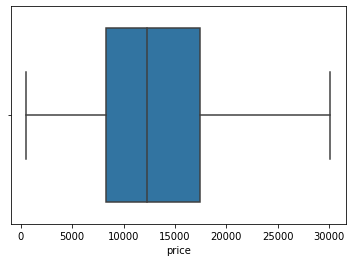

In [31]:
import seaborn as sns
sns.boxplot(x=car_dataset['price'])

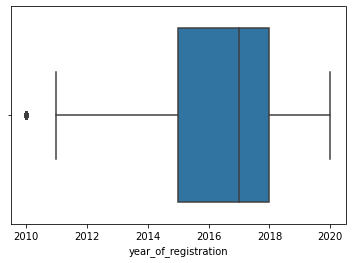

In [32]:
import seaborn as sns
sns.boxplot(x=car_dataset['year_of_registration'])

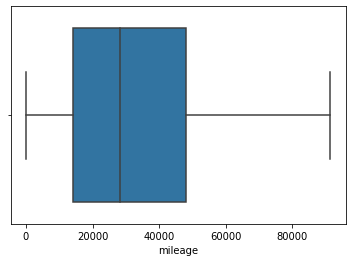

In [33]:
import seaborn as sns
sns.boxplot(x=car_dataset['mileage'])

**Outliers are treated and now exploreing the rest things**

In [34]:
car_dataset.dtypes

mileage                  float64
reg_code                   int64
standard_colour           object
standard_make             object
standard_model            object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van      int64
fuel_type                 object
dtype: object

In [35]:
car_dataset['year_of_registration'] = car_dataset['year_of_registration'].astype(int)   
car_dataset['mileage'] = car_dataset['mileage'].astype(int)   

**Handling Skewed Data**

**After hanling the missing values and outliers we can see the percentage of skew data got reduced grastically.**

In [36]:
car_dataset.skew(axis = 0)

<ipython-input-36-30ecc9cf7310>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_dataset.skew(axis = 0)


mileage                   0.633733
reg_code                 -0.015280
year_of_registration     -0.621452
price                     0.597581
crossover_car_and_van    18.746862
dtype: float64

**No action is required in terms of Skewed Data**

**Finding Correlation between variables**

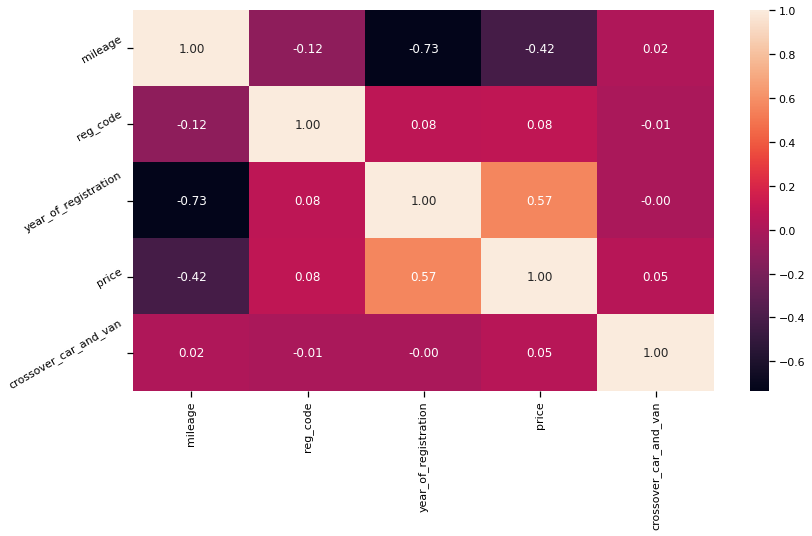

In [37]:
corr = car_dataset.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# **Association and Group Differences Analysis**

In [38]:
car_dataset.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'year_of_registration', 'price', 'body_type',
       'crossover_car_and_van', 'fuel_type'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


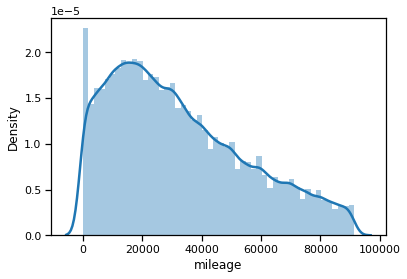

In [39]:
sns.distplot(car_dataset['mileage'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


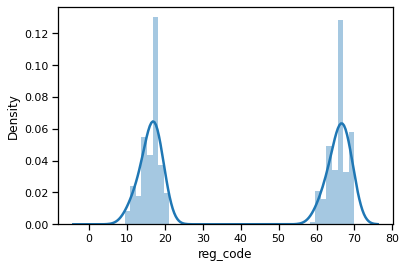

In [40]:
sns.distplot(car_dataset['reg_code'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


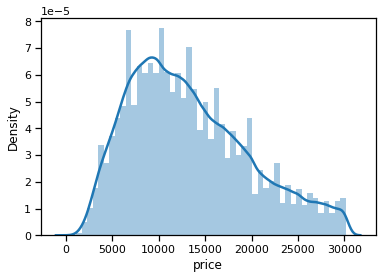

In [41]:
sns.distplot(car_dataset['price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


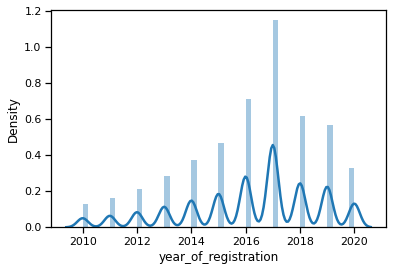

In [42]:

sns.distplot(car_dataset['year_of_registration'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


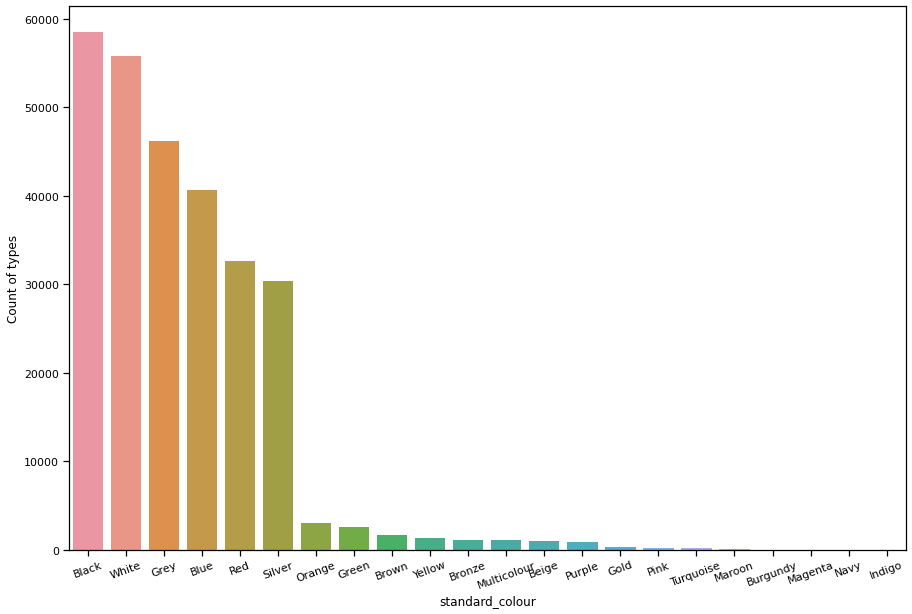

<Figure size 432x288 with 0 Axes>

In [43]:
from matplotlib.pyplot import xticks
fig, ax = plt.subplots(figsize = (15,10))
plt1 = sns.countplot(car_dataset['standard_colour'], order=pd.value_counts(car_dataset['standard_colour']).index,)
plt1.set(xlabel = 'standard_colour', ylabel= 'Count of types')
xticks(rotation = 20)
plt.show()
plt.tight_layout()

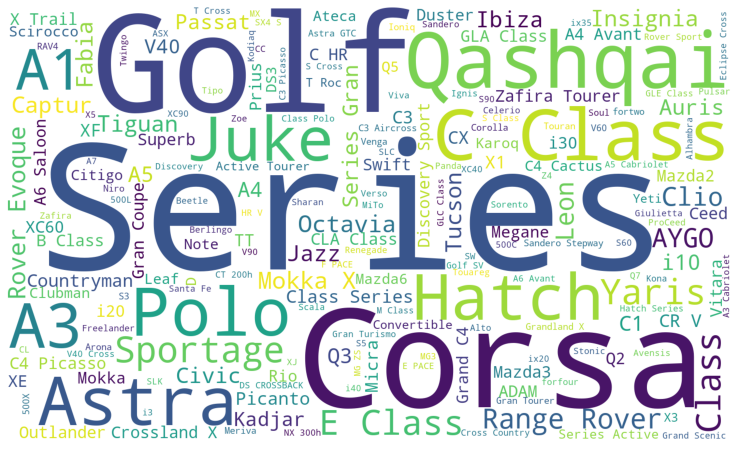

In [44]:
from wordcloud import WordCloud, STOPWORDS
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='white',width=1500,height=900).generate(" ".join(car_dataset['standard_model']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

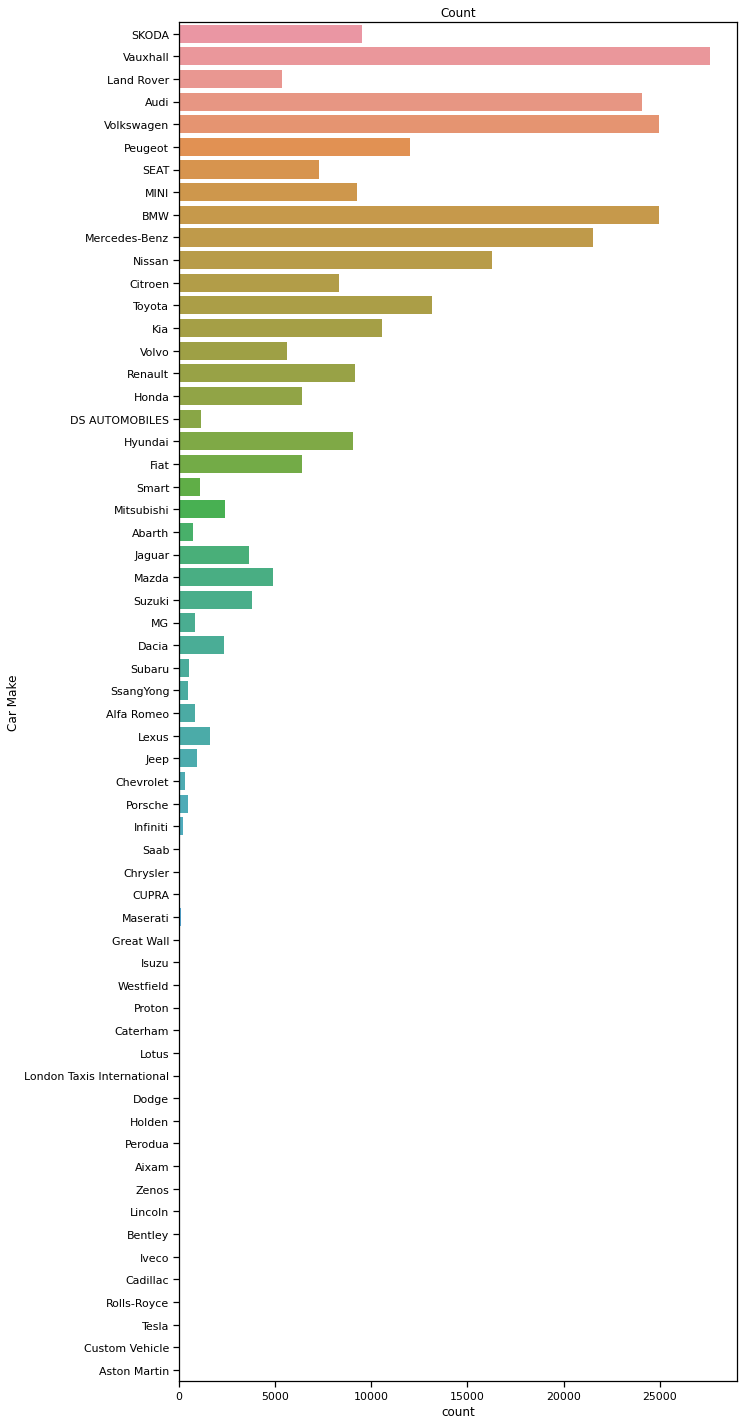

In [45]:
plt.figure(figsize=(10, 25))
sns.countplot(y=car_dataset['standard_make'])
plt.ylabel('Car Make')
plt.title('Count')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


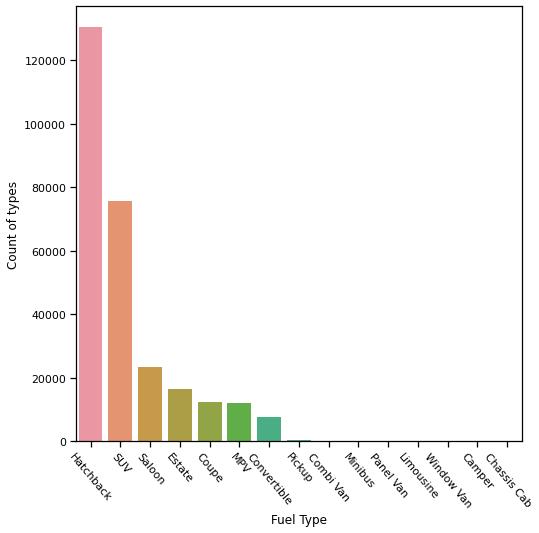

<Figure size 432x288 with 0 Axes>

In [46]:
fig, ax = plt.subplots(figsize = (8,8))
plt1 = sns.countplot(car_dataset['body_type'], order=pd.value_counts(car_dataset['body_type']).index,)
plt1.set(xlabel = 'Fuel Type', ylabel= 'Count of types')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

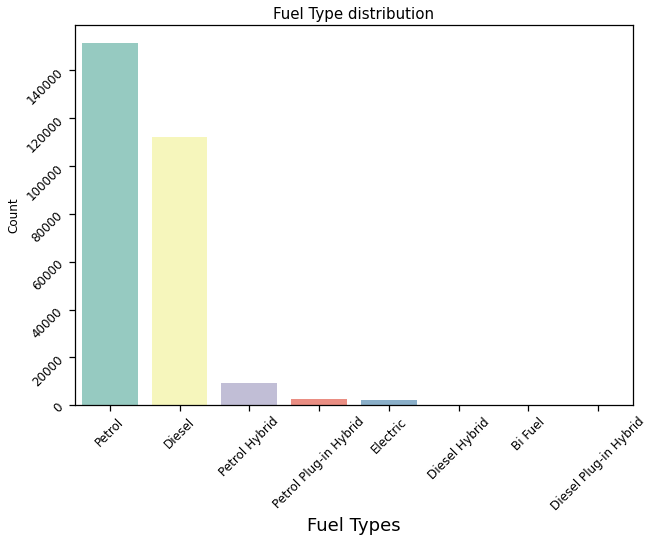

In [47]:
ct = car_dataset['fuel_type'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=ct.index, y=ct.values, palette="Set3")
plt.ylabel('Count')
plt.xlabel('Fuel Types', style = 'normal', size = 18)
plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.title('Fuel Type distribution',color = 'black',fontsize=15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


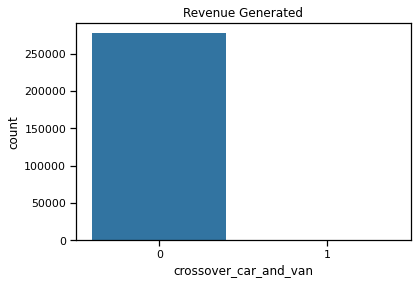

In [48]:
k = sns.countplot(car_dataset['crossover_car_and_van'])
k.set_xticklabels(['0','1'])
#displaying the title
plt.title("Revenue Generated")
plt.show()

**Price Vs Standard Model**

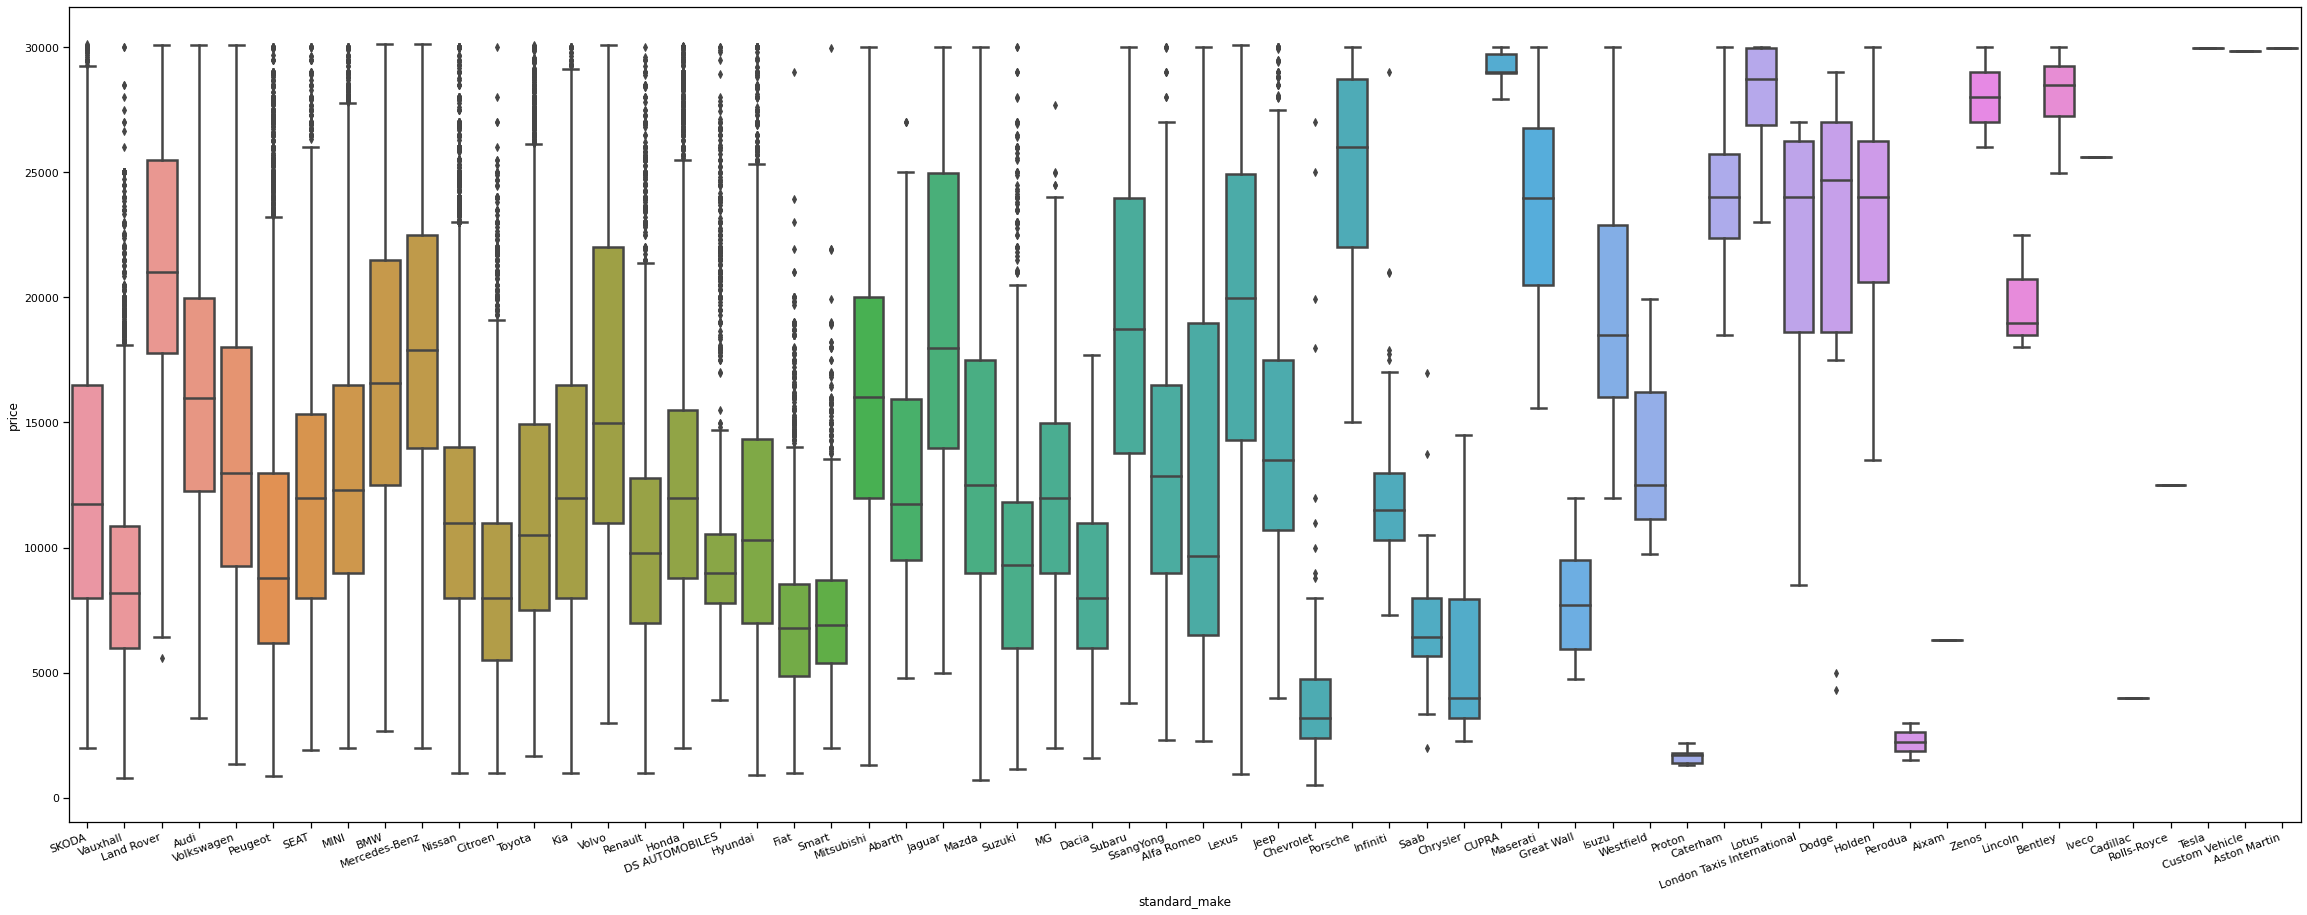

In [49]:
# Standard Make
import seaborn as sns
plt.subplots(figsize=(40,15))
ax=sns.boxplot(x='standard_make', y=car_dataset['price'], data=car_dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha='right')
plt.show()

**Price Vs Body Type**

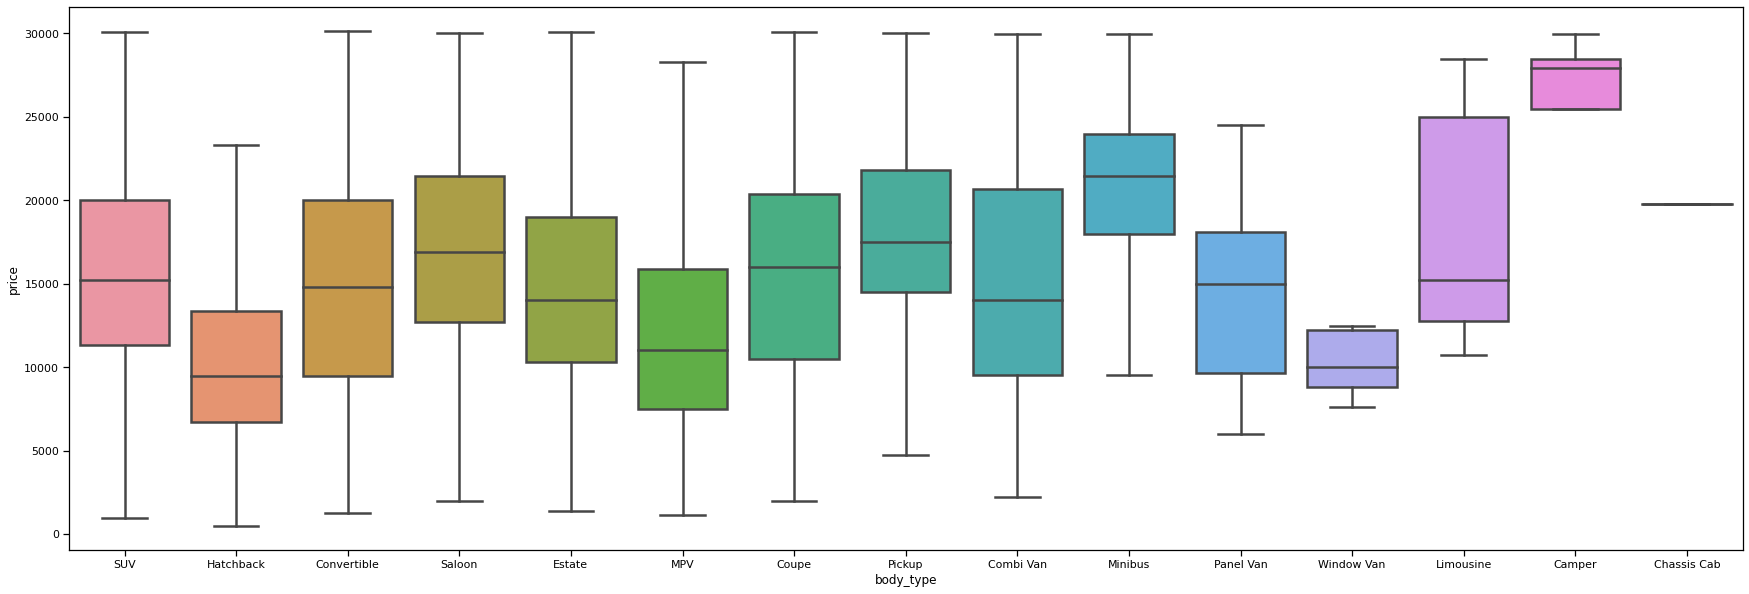

In [50]:
plt.figure(figsize=(30,10)) # To see the type-size relation
fig = sns.boxplot(x='body_type', y='price', data=car_dataset, showfliers=False)

**Price Vs Fuel type**

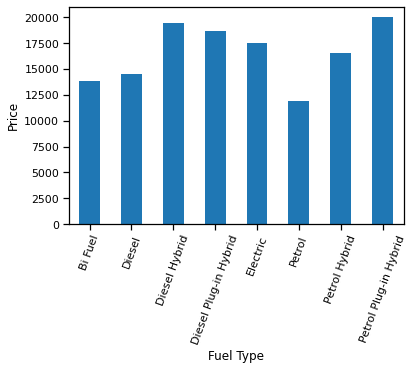

In [51]:
from matplotlib.pyplot import xticks
df_fuel_avg_price = car_dataset[['fuel_type','price']].groupby("fuel_type", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fuel_type', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Price")
xticks(rotation = 70)
plt.show()

**Price Vs Year_of_registration**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


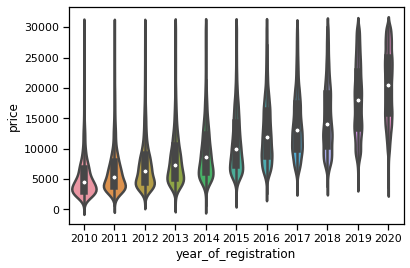

In [52]:
sns.violinplot('year_of_registration', 'price', data = car_dataset)

**Pair Plot**

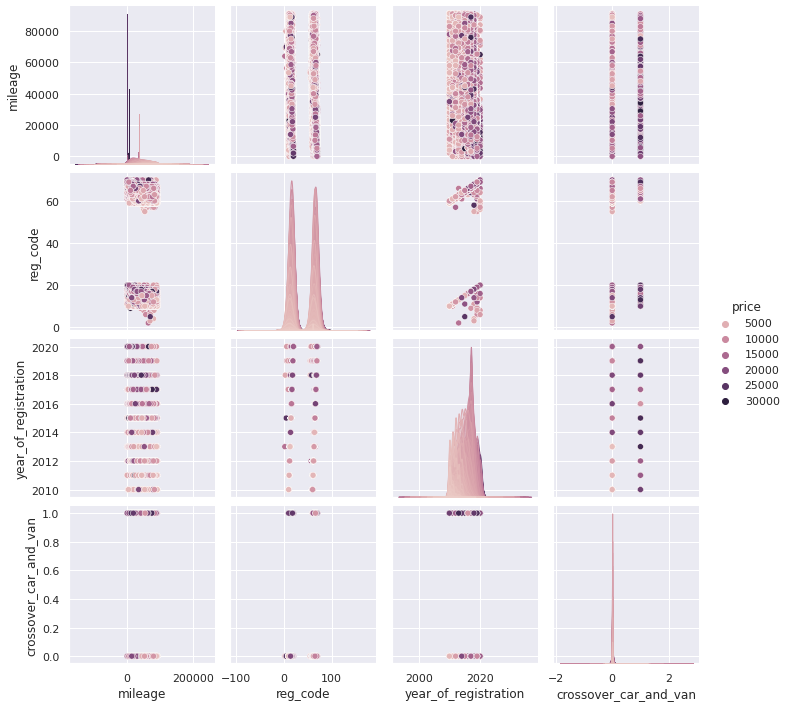

In [53]:
sns.set_theme(style="darkgrid")
sns.pairplot(car_dataset, hue="price")

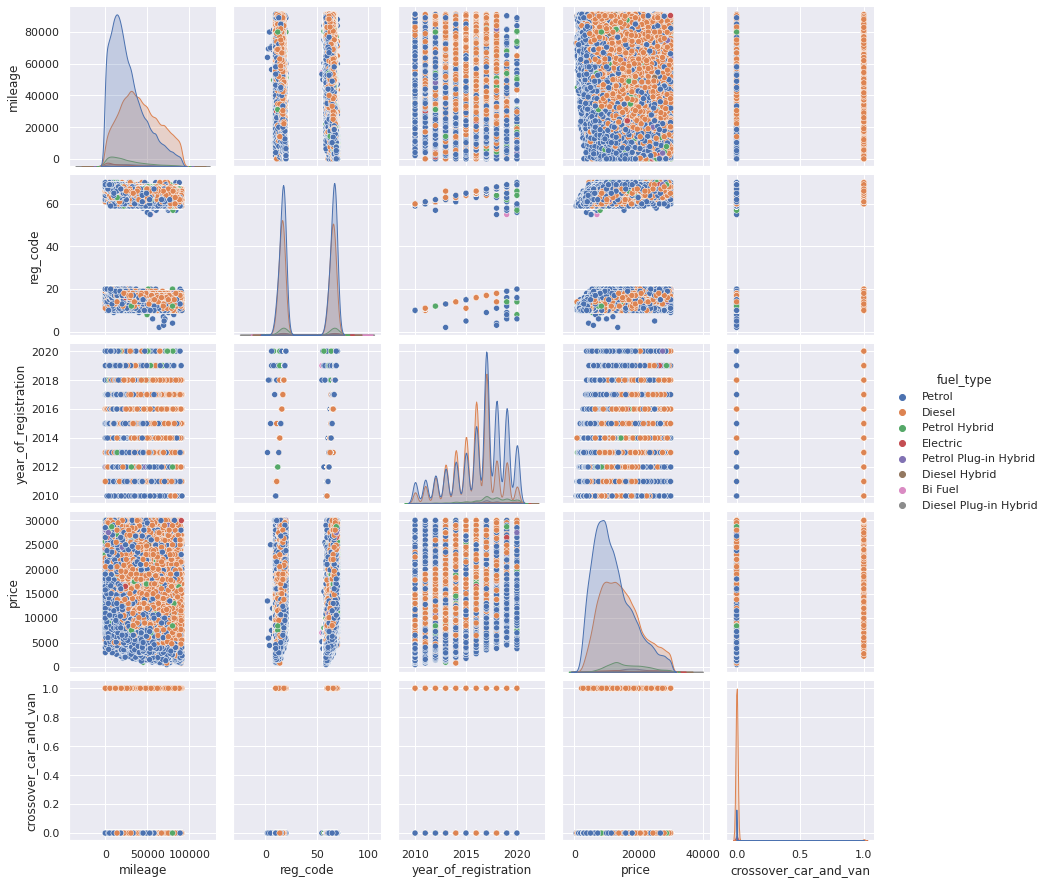

In [54]:
sns.pairplot(car_dataset, hue="fuel_type")

**Categorical Analysis using Klib**

In [55]:
import klib
import pandas as pd
df = pd.DataFrame(car_dataset)

In [57]:
klib.describe 

<module 'klib.describe' from '/usr/local/lib/python3.8/dist-packages/klib/describe.py'>

GridSpec(6, 5)

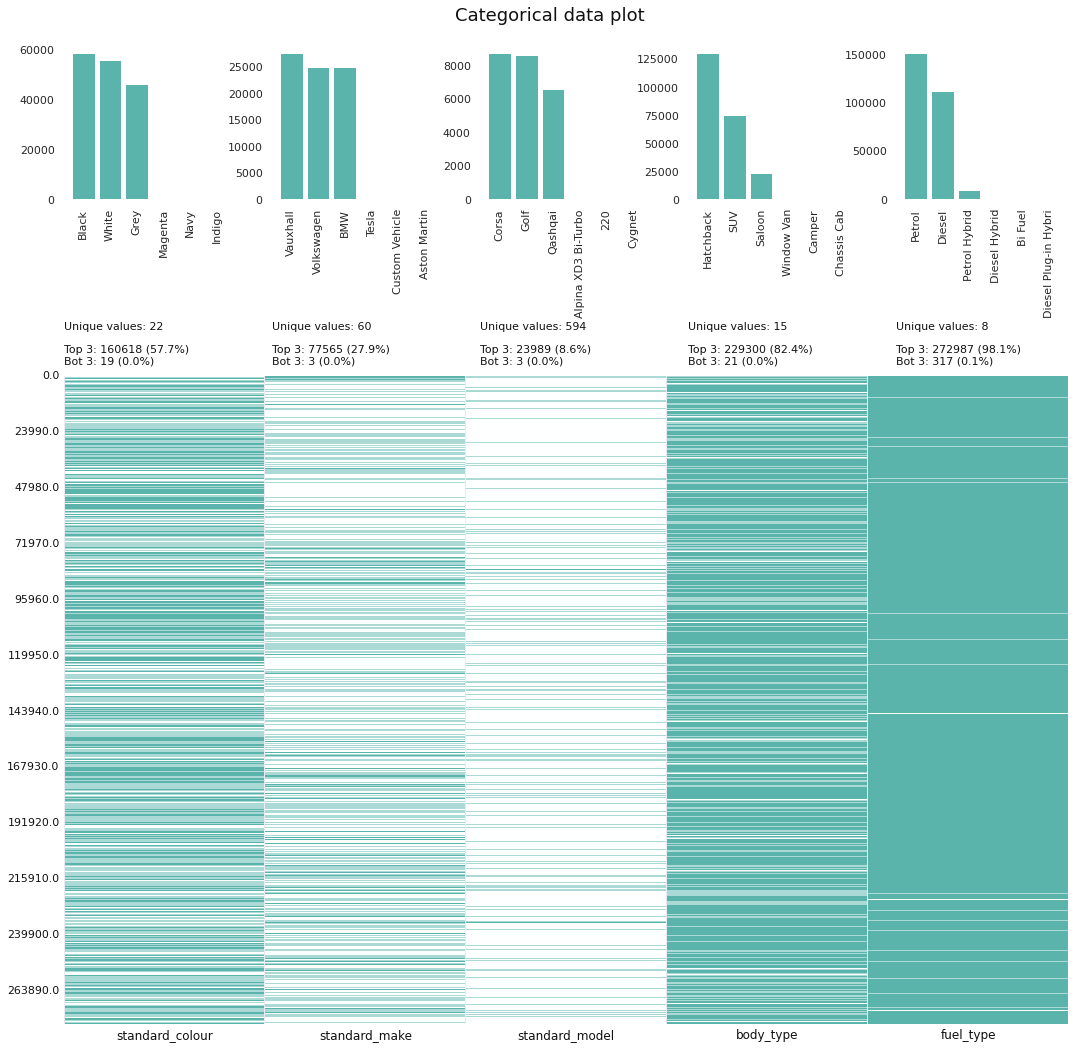

In [58]:
klib.cat_plot(car_dataset)

**Numerical Analysis/distribution using Klib library**

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


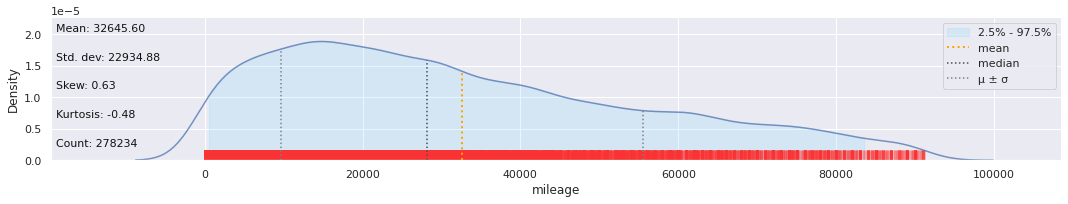

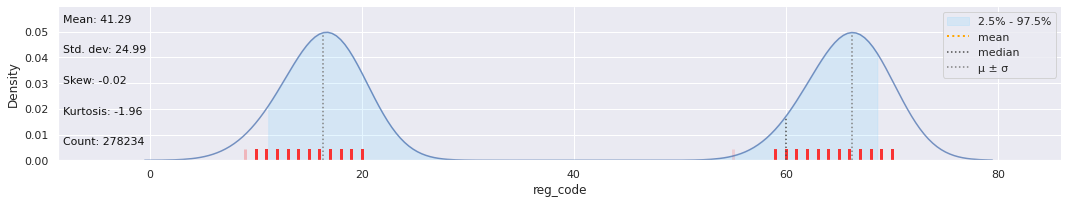

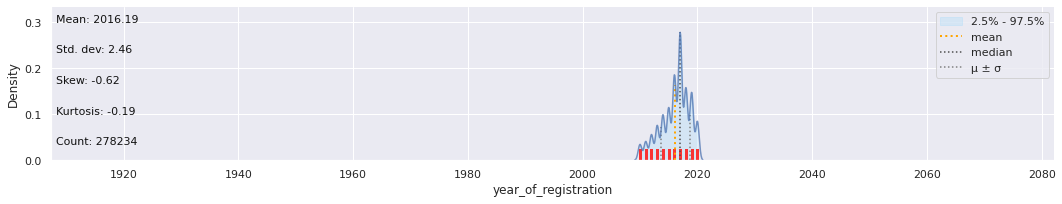

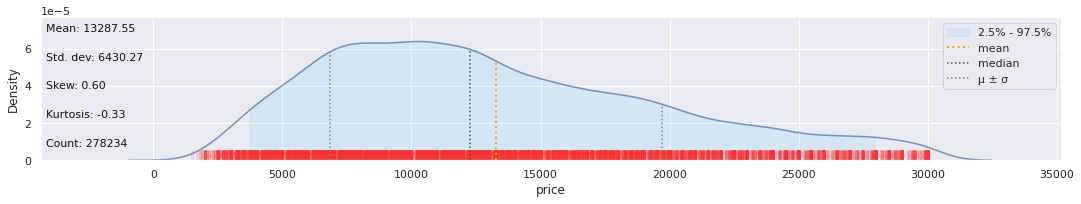

In [59]:
klib.dist_plot(df)

**Price Vs Fuel Type**

# **Model Implementation**

In [60]:
X=car_dataset.drop(columns='price')
y=car_dataset['price']

In [61]:
X

,mileage,reg_code,standard_colour,standard_make,standard_model,year_of_registration,body_type,crossover_car_and_van,fuel_type
2,7800,17,Grey,SKODA,Yeti,2017,SUV,0,Petrol
3,45000,16,Brown,Vauxhall,Mokka,2016,Hatchback,0,Diesel
4,64000,64,Grey,Land Rover,Range Rover Sport,2015,SUV,0,Diesel
5,16000,17,Blue,Audi,S5,2017,Convertible,0,Petrol
6,24075,17,Red,Vauxhall,Viva,2017,Hatchback,0,Petrol
...,...,...,...,...,...,...,...,...,...
401997,4075,69,Grey,Nissan,Juke,2019,SUV,0,Petrol
402000,5179,69,Grey,Peugeot,208,2019,Hatchback,0,Petrol
402002,52760,62,White,Nissan,Qashqai,2012,SUV,0,Petrol
402003,10250,65,Red,Abarth,595,2015,Hatchback,0,Petrol


In [62]:
y

2         14000
3          7995
4         26995
5         29000
6          5861
          ...  
401997    18000
402000    10595
402002     7250
402003    11490
402004    20520
Name: price, Length: 278234, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [64]:
car_dataset.dtypes

mileage                   int64
reg_code                  int64
standard_colour          object
standard_make            object
standard_model           object
year_of_registration      int64
price                     int64
body_type                object
crossover_car_and_van     int64
fuel_type                object
dtype: object

In [65]:
ohe=OneHotEncoder()
ohe.fit(X[['standard_colour','standard_make', 'standard_model','body_type','fuel_type']])

OneHotEncoder()

In [66]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['standard_colour','standard_make', 'standard_model','body_type','fuel_type']),
                                    remainder='passthrough')

In [67]:
lr=LinearRegression()

In [68]:
car_dataset.dtypes

mileage                   int64
reg_code                  int64
standard_colour          object
standard_make            object
standard_model           object
year_of_registration      int64
price                     int64
body_type                object
crossover_car_and_van     int64
fuel_type                object
dtype: object

In [69]:
pipe=make_pipeline(column_trans,lr)

In [70]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Beige', 'Black', 'Blue', 'Bronze', 'Brown', 'Burgundy', 'Gold',
       'Green', 'Grey', 'Indigo', 'Magenta', 'Maroon', 'Multicolour',
       'Navy', 'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'Turquoise',
       'White', 'Yellow'], dtype=object),
                                                                            a...
       'Estate', 'Hatchback', 'Limousine', 'MPV', 'Minibus', 'Panel Van',
       'Pickup', 'SUV', 'Saloon', 'Window Van'], dtype=object),
                                                                            array(['Bi Fuel', 'Diesel', 'Diesel Hybrid', 'Diesel Plug-in Hybrid',
       'Electric', 'Petrol', 'Petrol Hybrid', 'Petrol Plug-in Hybrid'],
      dtype=object)]),
                                          

In [71]:
y_pred=pipe.predict(X_test)

In [72]:
r2_score(y_test,y_pred)

0.7935160011854421